## 머신러닝
# 군집 (Clustering)

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### K-means
- iris 에서 setosa 50개와 나머지에서 50개를 뽑는다

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.data.shape

(150, 4)

In [9]:
setosa = iris.data[:50]

idx = np.random.randint(100, 150, size=50)
other = iris.data[idx]

setosa.shape, other.shape

((50, 4), (50, 4))

In [10]:
idx

array([102, 111, 106, 127, 117, 107, 105, 148, 107, 136, 148, 101, 118,
       137, 113, 131, 132, 119, 126, 139, 105, 130, 140, 119, 131, 109,
       121, 108, 102, 116, 128, 140, 127, 149, 110, 129, 106, 117, 113,
       144, 122, 128, 146, 104, 102, 110, 119, 123, 100, 117])

In [11]:
X = np.vstack([setosa, other]) # 합친다
X = np.random.permutation(X) # 섞는다
X.shape

(100, 4)

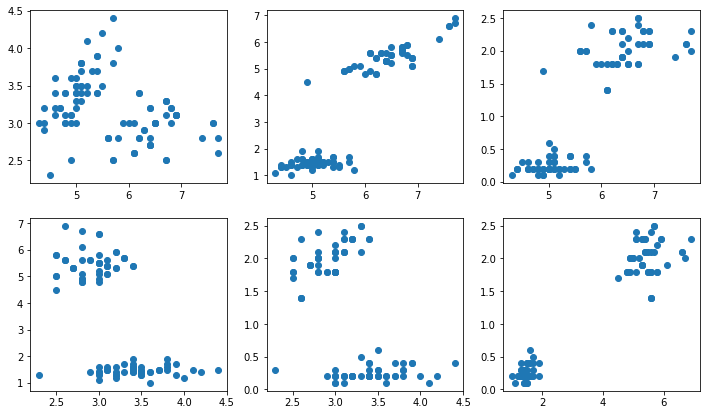

In [20]:
plt.figure(figsize=[12,7])

plt.subplot(2,3,1)
plt.scatter(X[:,0], X[:,1])

plt.subplot(2,3,2)
plt.scatter(X[:,0], X[:,2])

plt.subplot(2,3,3)
plt.scatter(X[:,0], X[:,3])

plt.subplot(2,3,4)
plt.scatter(X[:,1], X[:,2])

plt.subplot(2,3,5)
plt.scatter(X[:,1], X[:,3])

plt.subplot(2,3,6)
plt.scatter(X[:,2], X[:,3])

In [5]:
from sklearn.cluster import KMeans

In [20]:
model = KMeans(2) # 2개의 그룹으로 나눔
model.fit(X) # 목표값이 없다

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [21]:
labels = model.labels_
labels

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1])

In [22]:
labels = model.predict(X)
labels

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1])

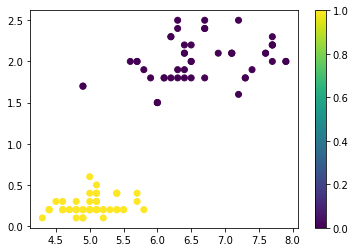

In [23]:
plt.scatter(X[:,0], X[:,3], c=labels)
plt.colorbar()

In [16]:
model.cluster_centers_ # 중심점 2개 (속성이 4개이므로 중심점의 좌표는 4차원)

array([[5.006, 3.428, 1.462, 0.246],
       [6.46 , 2.916, 5.466, 2.01 ]])

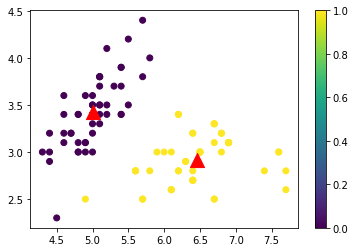

In [18]:
plt.scatter(X[:,0], X[:,1], c=labels)
cp = model.cluster_centers_
plt.scatter(cp[:,0], cp[:,1], marker='^', c='r', s=200)
plt.colorbar()

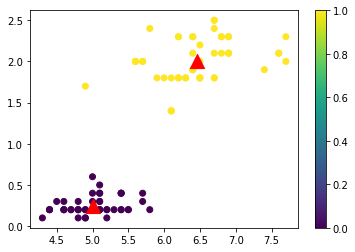

In [19]:
plt.scatter(X[:,0], X[:,3], c=labels)
cp = model.cluster_centers_
plt.scatter(cp[:,0], cp[:,3], marker='^', c='r', s=200)
plt.colorbar()

- KMeans 는 transform() 함수를 이용해 중심점에서의 거리를 구할 수 있다
- 결국, 속성이 4개에서 2개로 줄이는 효과를 가진다
- K값을 얼마로 주느냐에 따라 속성을 원하는 대로 늘리거나 줄일 수 있다
- K=2 인 경우 시각화를 위해 아주 유용하다

In [21]:
X2 = model.transform(X)
X2.shape

(100, 2)

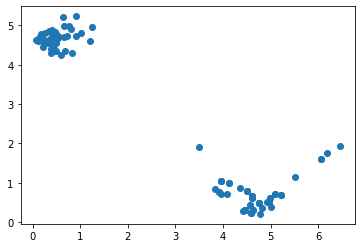

In [24]:
plt.scatter(X2[:,0], X2[:,1]) # c=labels

### DBSCAN

In [25]:
from sklearn.datasets import make_moons

X, y = make_moons(noise=0.07, random_state=1)
display(X.shape, y)

(100, 2)

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

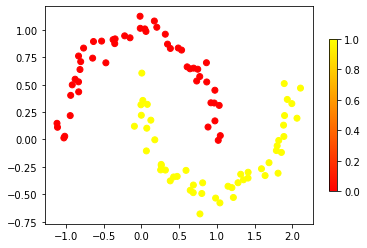

In [26]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='autumn')
plt.colorbar(shrink=0.7)

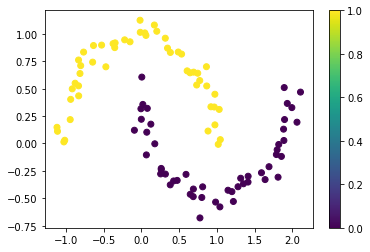

In [27]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(min_samples=3, eps=0.3)
    ### 원의 반지름이 eps, 원안에 min_samples 의 점이 있을 경우 확장됨
dbscan.fit(X)

plt.scatter(X[:,0], X[:,1], c=dbscan.labels_)
plt.colorbar()

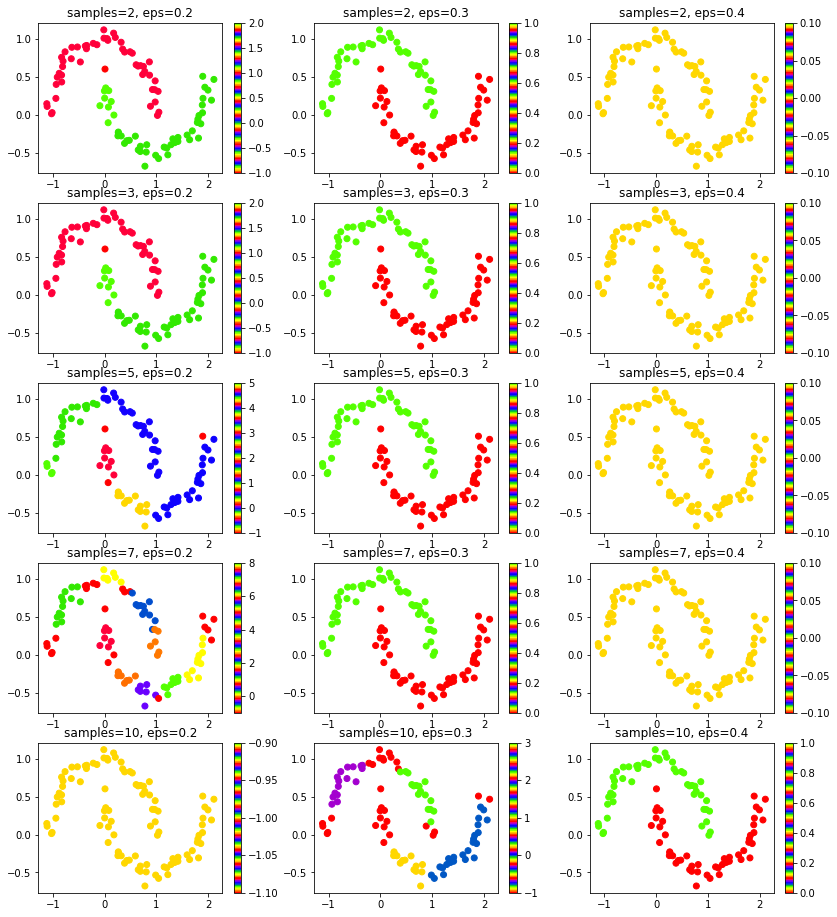

In [28]:
n=1
plt.figure(figsize=[14,16])

for samples in [2,3,5,7,10]:
    for eps in [0.2, 0.3, 0.4]:
        dbscan = DBSCAN(min_samples=samples, eps=eps)
        label = dbscan.fit_predict(X)
        
        plt.subplot(5,3,n); n+=1
        plt.title('samples=%d, eps=%.1f' % (samples,eps))
        plt.scatter(X[:,0], X[:,1], c=label, cmap='prism')
        plt.colorbar()